## 1 Time-Varying Data

The goal of this assignment is for you to learn how to use Python to manipulate and visualize time-varying data. We'll use an auditory neurophysiology experiment to illustrate the key concepts. In this experiment, recordings of bird songs were presented to an animal while we recorded from neurons in the auditory system.

![experiment diagram](images/experiment_diagram.png "Auditory Neurophysiology Experiment")

This web page is a Python notebook. It's a interactive document that lets you mix text and computer code, organized into `cells`. A cell can contain either text or code. This is a text cell. You can edit the contents of this cell by double-clicking, then save by typing `Ctrl-Enter`.

Some of the cells are left blank or have placeholder text (in *italics*). **Your assignment is to complete those cells**. Download the notebook as an 'ipynb' file (see the `File/Download as` menu) and submit this for grading.

The cell below this is a code cell, as indicated by `In [ ]:` off to the left. When you type `Ctrl-Enter` in a code cell, the contents are passed to the Python interpreter. Each line is evaluated in turn. If the last line generates some output, this will be shown below the code cell. To run the notebook, you need to type `Ctrl-Enter` in each cell (including the one below):

In [54]:
# Python comments are marked by `#`

# These lines of code import some external libraries we'll use in this exercise:
%matplotlib inline
import numpy as np
import IPython
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['image.origin'] = 'lower'
mpl.rcParams['image.aspect'] = 'auto'
mpl.rcParams['image.cmap'] = 'jet'
mpl.rcParams['figure.figsize'] = (15.0, 4.0)

# This is a Python string literal. It will evaluate to itself.
"Hello world"

'Hello world'

Take a look at the menus and buttons above. You can cut and paste cells with the `Edit` menu to move them around. You can execute one or more cells using the `Cell` menu. The Python interpreter is called a `kernel`. Under the `Kernel` menu, you can restart or interrupt the interpreter if it gets stuck. The `Help` menu explains more about using the notebook and has links to some of the main scientific programming libraries.

If you're completely new to programming or to Python, you should go through the following exercises from [Software Carpentry](https://software-carpentry.org/). This should take you about 60-90 minutes. You can create new notebooks under `File/New Notebook` to work through them, or you can insert cells here.

- [Running and Quitting Python](http://swcarpentry.github.io/python-novice-gapminder/01-run-quit/)
- [Variables](http://swcarpentry.github.io/python-novice-gapminder/02-variables/)
- [Data Types](http://swcarpentry.github.io/python-novice-gapminder/03-types-conversion/)
- [Functions](http://swcarpentry.github.io/python-novice-gapminder/04-built-in/)
- [Lists](http://swcarpentry.github.io/python-novice-gapminder/11-lists/)
- [Loops](http://swcarpentry.github.io/python-novice-gapminder/12-for-loops/)

---
### Working with Time Series and Point Process Data

In neuroscience, much of the data we'll be working with represents some process that changes in time. There are two fundamental ways of representing time-varying data in a computer:

- A **time series** is a quantitative physical property of a system measured over a time interval. In digital computers, time series data are always sampled at discrete moments in time, usually at fixed intervals. The *sampling rate* of the data is the number of times per second the underlying process was measured. Examples of time series include sound waveforms and recordings of extracellular voltage.

- A **point process** is a series of times when an event took place. An example of a point process is the set of times when a neuron produced an action potential (spike).

Both point processes and time series are represented in Python in data structures called an `arrays`. For a time series, the array holds the sequence of measurements. For a point process, the array holds the sequence of event times. We'll use a library called [numpy](http://www.numpy.org/) to store and manipulate arrays. Note that in the first code cell above, we imported the numpy library and gave it the alias `np`, so all the calls to numpy functions will be preceded by `np.`

Here's an example of creating an array:

In [2]:
arr = np.array([1.0, 1.2, 0.8, 1.0])

As with lists, we can access specific elements or ranges of elements using indices. Note that Python uses zero-based indexing, which means that the index of the first element is 0, not 1.

In [3]:
arr[0]

1.0

In [4]:
arr[:2]

array([0.8, 1. ])

The last example used [slice notation](https://www.pythoncentral.io/how-to-slice-listsarrays-and-tuples-in-python/) to request the first two elements of the array. Slices are a powerful feature when working with arrays and other collections.

You can do math operations on every element of the array with a single function call:

In [5]:
np.sin(arr)

array([0.84147098, 0.93203909, 0.71735609, 0.84147098])

You can add a scalar to an array, or add two arrays of the same size.

In [6]:
56 + arr

array([57. , 57.2, 56.8, 57. ])

In [7]:
arr + (2 * arr)

array([3. , 3.6, 2.4, 3. ])

---
## Working with Acoustic Stimuli

Sound consists of waves of pressure moving through the air or another medium. When these waves press against the eardrum, the bones (or bone, if you're a bird) in the middle ear transmit the wave to the fluid in the cochlea. Movements in this fluid are detected by hair cells, which transduce the sound into neural signals. Sound is recorded with a microphone, which transduces pressure changes into electrical voltage changes. These in turn can be sampled by a digitizer and turned into an array of numbers. Although the sound wave is traveling through space, your eardrum or a microphone sits at a specific location and responds to changes in the pressure. Look at the animation below and imagine what you would measure over time at the location of the rightmost red dot.

![acoustic wave](images/Planewave1.gif "Traveling Pressure Wave")

Sound recordings can be stored in a variety of file formats. One of the most common is the `wave` format, which is what we'll be using here. The stimulus files used in this experiment have been placed in the `stimuli` directory. We can use the `os` module in Python to get a list of the contents of this directory:

In [8]:
import os
os.listdir('stimuli')

['motifs.csv',
 'A2.wav',
 'A0.wav',
 'C8.wav',
 'B8.wav',
 'A6.wav',
 'C2.wav',
 'B6.wav',
 'A8.wav',
 'C0.wav',
 'B0.wav',
 'B2.wav',
 'C6.wav']

Let's listen to `A0.wav`. If you prefer, you can download the file using [this link](stimuli/A0.wav) and open it in a sound-processing program like [Audacity](http://www.audacityteam.org/).

In [55]:
IPython.display.Audio('stimuli/A0.wav') 

Here we'll use a python package called `ewave` to load the file. The `ewave.open` function returns an object that we can use to access the data. We'll assign this object to the variable `wavfile`. An important quantity to note is the **sampling rate**, which indicates how frequently the sound pressure wave was measured during the recording. The units are samples per second, or *Hz*.

In [56]:
import ewave
wavfile = ewave.open("stimuli/A0.wav")
wavfile

<open ewave.wavfile 'b'stimuli/A0.wav'', mode 'r', dtype 'int16', sampling rate 20000 at 0x11059a898>

We can then read the contents of the file into an array using the `read` method. *Methods* are functions that have been associated with an object, and they're called like this. You can see that the `read` method returned an array of 16-bit integers.

In [11]:
osc = wavfile.read(memmap=False)
osc

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

Note that `...` means Python is omitting the samples in the middle, so we don't know how long the array is. To get the number of samples in the array, we use the builtin `len` function:

In [12]:
len(osc)

192113

**Question 1**: In the cell below, enter code that will return the length of the recording, in seconds.

In [13]:
## enter your code here, replacing this comment

#### Visualizing time series

We can't learn much about the sound just by looking at the numbers in the array. We need to plot it out using the matplotlib library. We've imported matplotlib into the variable `plt`, and we'll use the most basic plotting function, `plot`. Remember that you can get a list of functions in `plt` by typing `plt.` and then hitting the `Tab` key. You can also get help about a specific function by typing `Shift-Tab` inside the parentheses of the function. Try putting your cursor on `osc` in the cell below and typing `Shift-Tab`. Click the up arrow to get the full documentation string.

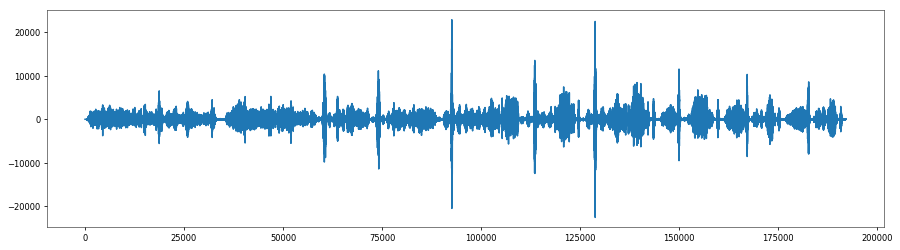

In [40]:
plt.plot(osc)

The plot this command generates by default is a line plot. Because there are so many data points in the array, what you see is a waveform that primarily represents the overall amplitude of the sound. The y-axis indicates the values in the array, which have arbitrary units. We only provided a single array to the `plot` function, so the x-axis indicates the number of samples.  To plot the signal as a function of time, we'll need to create a second array that holds the time at each sample:

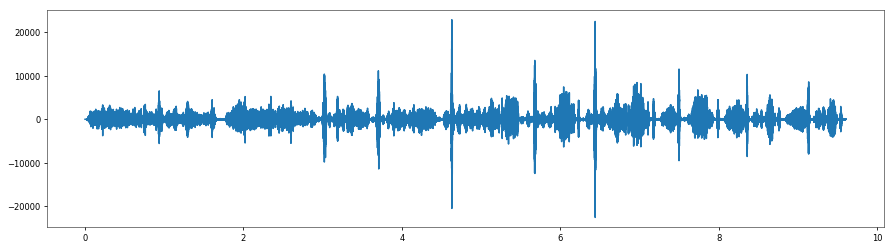

In [41]:
t = np.arange(0.0, len(osc)) / wavfile.sampling_rate
plt.plot(t, osc)

**Question 2**: In the cell below, plot samples 1000-2000 of the waveform, as a function of time in *milliseconds*. Hint: you'll need to take advantage of some of the features of arrays discussed above.

In [18]:
# enter code here

**Question 3**: In the cell below, describe what the waveform looks like. How is it similar to the waveform in the animation above? How is it different?

*Double click this text and enter your response*

#### Spectrograms

Another way of visualizing a time series is as a spectrogram. The spectrogram is based on a mathematical operation called the [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform), which converts a signal from the *time domain* to the *frequency domain*. That is, instead of representing the sound pressure as a function of time, we will show how much the signal varies as a function of frequency.

In a spectrogram, the original signal is divided up into short, overlapping windows. The signal in each window is converted to a frequency representation using the Fourier transform, and then the windows are "stacked up" to produce a two-dimensional image, with time on the x-axis and frequency on the y-axis.

![spectrogram calculation](images/spectrogram_calculation.png)

You can read a spectrogram a little bit like a musical score. The intensity of the image indicates how much power there is in the signal at a particular time and frequency. There are many different color schemes, but this is largely a matter of preference.

Let's calculate the spectrogram of the signal we just loaded. Although matplotlib comes with a spectrogram function, we're going to use an external library called `libtfr`. The cell below demonstrates the use of a user-defined function.

In [49]:
import libtfr

# this parameter controls the analysis window size
NFFT = 256
# this parameter controls the overlap
shift = 128
# this parameter controls the intensity scaling
compress = 1

def specgram(signal, nfft, shift, sampling_rate, compress):
    # generate a transform object
    D = libtfr.mfft_dpss(nfft, 3, 5, nfft)
    # calculate the power spectrogram
    P = D.mtspec(signal, shift)    
    freq, find = libtfr.fgrid(sampling_rate, nfft)
    bins = libtfr.tgrid(P, sampling_rate, shift)
    return (np.log10(P + compress) - np.log10(compress), freq, bins)

P, freq, bins = specgram(osc, NFFT, shift, wavfile.sampling_rate, compress)

To visualize the spectrogram, we'll need to use the `plt.imshow` function.

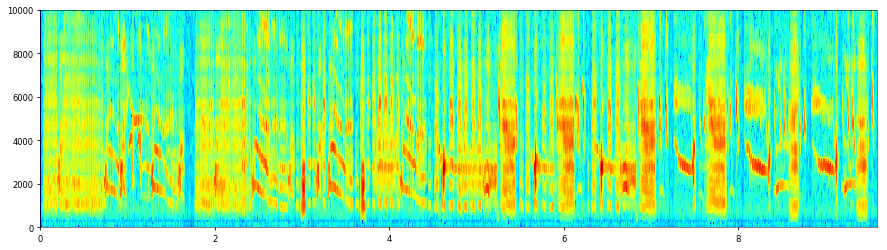

In [50]:
plt.imshow(P, extent=(bins[0], bins[-1], freq[0], freq[-1]))

This looks a lot more interesting, doesn't it? Try listening to the sound while following along the spectrogram from right to left.

In [57]:
IPython.display.Audio('stimuli/A0.wav') 

There are a number of parameters that can be tweaked to make this look as good as possible. In the cell below, adjust the values for NFFT, shift, and compress and then run the cell to see what the plot looks like and how it compares to the one above. If you want, you can zoom into a smaller interval by using slice notation on the `osc` array when you pass it to `specgram()`

**Question 4**: Once you've got a sense of what each parameter controls, pick values that allow you to to see good detail in the plot. You should be able to see clear vertical, horizontal, and curving lines.

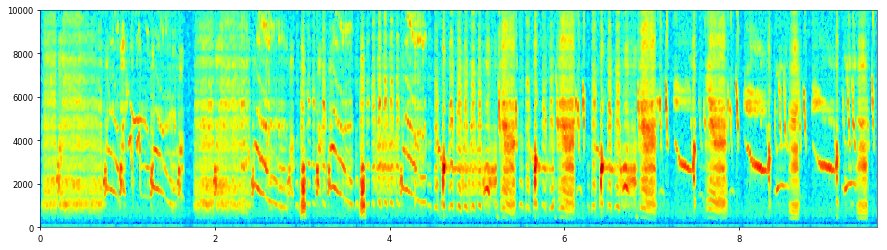

In [47]:
# replace NFFT, shift and compress with different values
P, freq, bins = specgram(osc, NFFT, shift, wavfile.sampling_rate, compress)
plt.imshow(P, extent=(bins[0], bins[-1], freq[0], freq[-1]))

**Question 5**: In the cell below, describe how changing `NFFT`, `shift`, and `compress` change the appearance of the plot. How are frequency and time resolution related to the window size (NFFT)?

*Double click this text and enter your response*

---
## Working with Spike Data

The basic structure of an auditory neurophysiology experiment is that we play a stimulus to the animal while recording from a single neuron in the brain. Each neuron is usually presented with a range of different stimuli to probe how selective it is or determine what parts of the stimulus excite it the best.

There are many sources of variability in the brain, so not every spike in a given trial is necessarily caused by the stimulus. Thus, each stimulus is usually presented 5-20 times to get an average that represents the part of the response that's driven by the stimulus. 

A key first step in analyzing the results of an experiment is to *sort spikes*. This is a process that takes the raw neural recordings, which are densely sampled time series, and extracts the times when a spike ocurred. To be able to say that a set of spikes represents a single neuron, we need to make sure that the waveforms are distinct from the noise. There are many different methods of doing *spike sorting*, but the end goal is the same: to produce a **point process** representation of the neural response.

![spike sorting diagram](images/spike_sorting_diagram.png)

Let's look at some spike data. We'll be using a format for spike time data called [pprox](https://meliza.org/spec:2/pprox/), which is an extension of the widely adopted JSON format.

In [ ]:
import json
